# Time-series analysis

## Brexit polls

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
import pandas as pd 
data = pd.read_csv("WhatUKThinks_EU_data.csv") 
#data

In [3]:
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data = data.set_index('Date')
#data.index

In [4]:
#print(data)

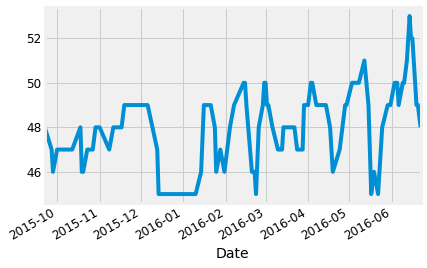

In [5]:
import matplotlib
%matplotlib inline
data.Leave.plot()

In [6]:
df = data.drop(['Remain'], axis = 1)

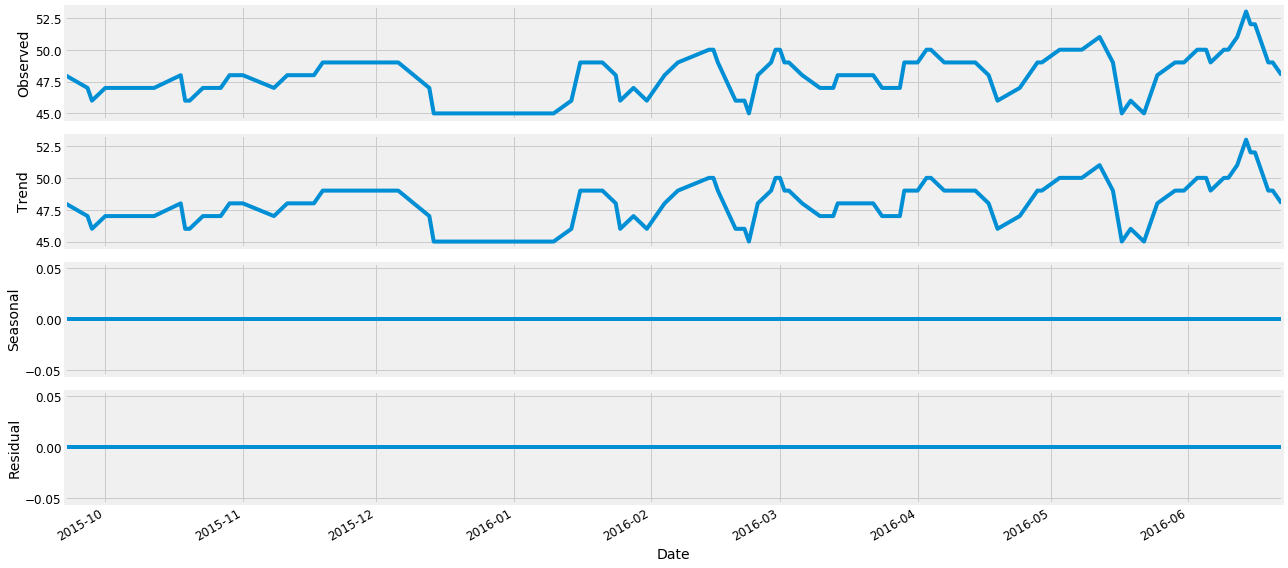

In [7]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df.Leave, model='additive', freq = 1)
fig = decomposition.plot()
plt.savefig('tsa_decompose.png')

We see no seasonal compoment.

In [8]:
import numpy as np
from scipy import stats
print (np.mean(df.Leave), np.var(df.Leave))

48.154545454545456 2.912479338842973


In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Leave,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:935.4635963651298
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:361.58607691364705
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:448.68236969766025
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:391.03880888601276
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:376.279996632652
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:361.72663605285703
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1004.6367318932158
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:801.3027900843505
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:381.9082746202752
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:301.51069209578714


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:452.4261903650363
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:329.3860802128627
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:323.0588552060332
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:302.57102654031013
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:283.572667024694
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:268.87070564411533
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:285.462857108525
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:285.45513837606075
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:297.9810365336585
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:270.59841167161596
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:310.25553989451726
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:279.42291162318674
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:355.81158182123136
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:265.0525327807817
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:284.303863157191
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:281.4128434183446
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:298.2796852917431
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:264.9396490245049
ARIMA(

We chose the model with lowest AIC

In [12]:
mod = sm.tsa.statespace.SARIMAX(df.Leave, order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7702      0.084      9.211      0.000       0.606       0.934
ma.L1          0.1963      0.122      1.607      0.108      -0.043       0.436
ma.S.L12      -1.0000   2422.059     -0.000      1.000   -4748.149    4746.149
sigma2         0.9706   2350.896      0.000      1.000   -4606.700    4608.641


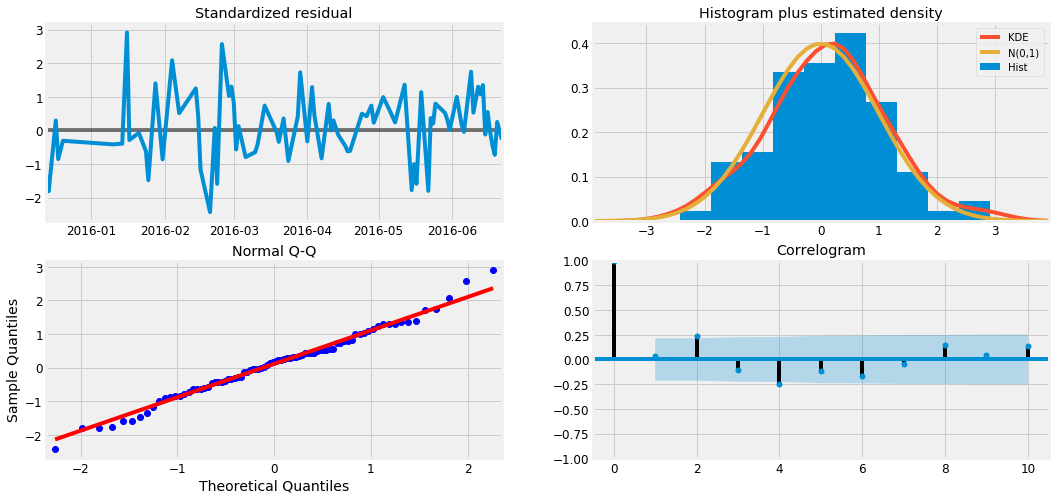

In [13]:
fig = results.plot_diagnostics(figsize=(16, 8))
plt.savefig('arima.png')

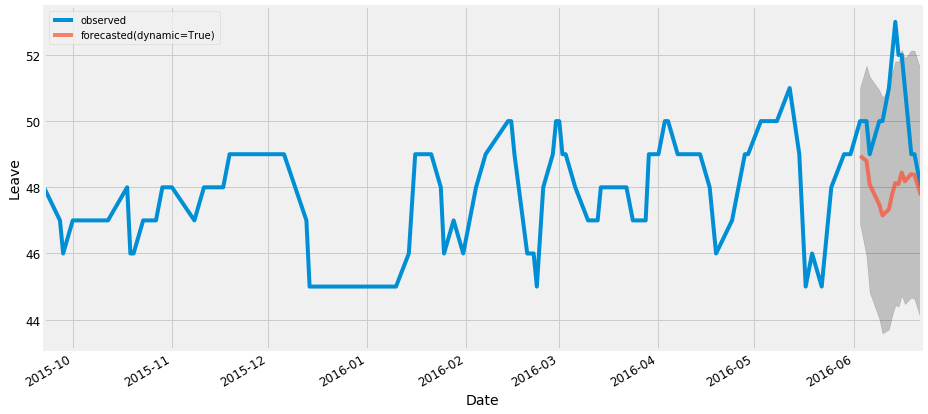

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2016-06-03'), dynamic=True)
pred_ci = pred.conf_int()
ax = df.Leave['2015':].plot(label='observed')
fig = pred.predicted_mean.plot(ax=ax, label='forecasted(dynamic=True)', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Leave')
plt.legend()
plt.savefig('forecast_dyn.png')

The model does not capture the behavior of the time-series in June correctly

In [18]:
y_forecasted = pred.predicted_mean
y_truth = df.Leave['2016-05-03':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7.49


In [19]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2.74


## Twitter sentiment

In [21]:
import pandas as pd 
import matplotlib
%matplotlib inline
dat = pd.read_csv("time_serie_s3_w3.csv") 
#dat

In [22]:
dat.reset_index(inplace=True)
dat['dates'] = pd.to_datetime(dat['dates'], dayfirst = True)
dat = dat.set_index('dates')
#dat.index

In [23]:
data=data.shift(-4)

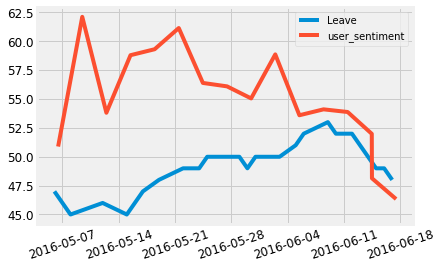

In [24]:
plt.plot(data.Leave['2016-05-06':'2016-06-19'])
plt.plot(dat.user_sentiment['2016-05-06':'2016-06-19']*100)
plt.legend()
plt.xticks(rotation=18)
plt.savefig('polls_twitter.png')

The similarity in trends in the end may be due to larger data set

In [28]:
import pandas as pd 
ts = pd.read_csv("time_serie.csv") 
ts.reset_index(inplace=True)
ts['dates'] = pd.to_datetime(ts['dates'], dayfirst = True)
ts = ts.set_index('dates')
#ts.index

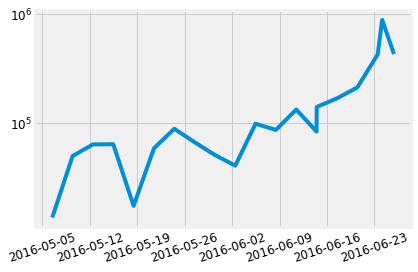

In [29]:
plt.loglog(ts.n_tweets)
plt.xticks(rotation=18)
plt.savefig('number_tweets.png')

 inspired by https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b 